## Project 3 -  Sweet Spot Swindle

By Jasmine Kamdar and Colin Takeda


In the game of billiards, the player seeks to have the greatest control over the cue ball and the target ball. In order to achieve the greatest amount of control one is often advised to hit the ball in the coveted 'sweet spot.' The 'sweet spot' has come to mean the height at which one applied a force where the cue ball immediately starts rolling without slipping. However, does the 'sweet spot' actually affect one's ability to play the game? 

**Question:** Does hitting the sweet spot in pool have a significant effect on the end result of a pool shot, if initial velocity is held constant? For this model, a significant effect will be quantified by the time taken to get to rolling without slipping and the difference in end velocity. 

**Methodology:** For heights other than the sweet spot, we will calculate the amount of time it takes for the ball to start rolling without slipping and the corresponding velocities and distances. 
For the sweet spot, the ball will immediately start rolling without slipping.
For both parts, we will then model the end velocity of these balls at a given constant distance.

**Assumptions:**

-Force is applied parallel to the ground

-Sweet spot is defined as immediate rolling without slipping

-The force is applied to a singular point



**Results:**
Time it takes different heights to get to a controlled state (rolling without slipping)
End velocities of the different hits


**Interpretation:**
The percent difference between applying a force at different heights, the sweet spot, and the control
Contacted the United STate Professional Pool Players Association to see if the sweet spot is a concept professional keep in mind


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr'

# import functions from the modsim.py module
from modsim import *


In [2]:
#adding units
m = UNITS.meter
s = UNITS.second
degree = UNITS.degree
radian = UNITS.radian
newton = UNITS.newton
kg = UNITS.kilogram

In [3]:
params = Params( #Coefficients / relavent metrics are by Dr. Dave Alciatore of Colorado State University
        
               v_0 = 1.9 * m/s, 
                    #initial velocity of an average shot
               cof_f= 0.2,     
                    #Coefficient of friction between the ball and table
               cof_res=0.015,   
                    #Coefficient of rolling resistance between the ball and table       
               r_ball = 0.05715/2 * m, 
                    #radius of ball
               m_ball = 0.17 * kg, 
                    #mass of ball
               g = 9.8 *m / s**2, 
                    #acceleration due to gravity
               L = 2.4384 * m, 
                    #farthest linear length on a pool table
               t_end = 50 * s, 
                    #max time
               t_cue = 0.002 *s, 
                    #amount of time cue is touching 
               h = 0
                    #height above radius shot is hit
              )
print(params)

v_0             1.9 meter / second
cof_f                          0.2
cof_res                      0.015
r_ball              0.028575 meter
m_ball               0.17 kilogram
g          9.8 meter / second ** 2
L                     2.4384 meter
t_end                    50 second
t_cue                 0.002 second
h                                0
dtype: object


In [4]:
def make_system(params):
    
    unpack(params)
    
    I = (2/5)*m_ball * r_ball**2 
        #moment of inertia of solid spherical ball
    F_f = cof_f*m_ball*g 
        #force of friction between the ball and table
    F_res = cof_res*m_ball*g 
        #force of rolling resistance between ball and table
          
    #F_init = m_ball*v_0/t_cue #Not sure if correct
    F_init = 20 * kg*m/s**2 
        #force applied by cue
         
    #w_0 = F_init*(h*m)/I*t_cue *radian
    w_0 = (h*v_0*(5/2))/r_ball**2 *radian*m
        #initial angular velocity as soon as cue applies force

    t_roll = abs((2/(7*cof_f*g))*(v_0-(r_ball*w_0)))


    #setting state variables
    init = State(x=0, theta=0, 
                 vx=v_0, omega=w_0) 
    
   
    return System(init=init,t_end=t_end,I=I,F_f=F_f,F_res=F_res,F_init=F_init,w_0=w_0,t_roll=t_roll)
  

In [5]:
system = make_system(params)
print(system)

init      x                          0
theta            ...
t_end                                             50 second
I                      5.55240825e-05 kilogram * meter ** 2
F_f       0.33320000000000005 kilogram * meter / second ...
F_res     0.024990000000000005 kilogram * meter / second...
F_init                  20.0 kilogram * meter / second ** 2
w_0                                     0.0 radian / second
t_roll                            0.2769679300291545 second
dtype: object


In [6]:
def slope_func(state, t, system):
    
    x, theta, v, omega = state
    unpack(system)
    t=t*s
    x=x*m
    
    if t < t_roll: #Slipping occurs
    
        #Linear Equations
        a = -(F_f+F_res)/m_ball
        v = sqrt((v_0**2)+(2*cof_f*g*x))
        
        #Rotation Equations
        omega = ((5*cof_f*g)/(2*r_ball))*t*radian
        alpha = (5*cof_f*g)/(2*r_ball) *radian
        
    else: #Rolling without Slipping 
        
        #Linear equations
        a = -F_res/m_ball #No friction when rolling without slipping
        v = v_0 + a*t
        
        #Rotation Equations
        omega = v/r_ball *radian
        alpha = a/r_ball *radian
        

    return v, omega, a, alpha

In [7]:
slope_func(system.init, 0, system)

(<Quantity(1.9, 'meter / second')>,
 <Quantity(0.0, 'radian / second')>,
 <Quantity(-2.107, 'meter / second ** 2')>,
 <Quantity(171.4785651793526, 'radian / second ** 2')>)

In [8]:
def event_func(state,t,system):
    
    unpack(system)
    x, theta, v, omega = state
  
    return L - x #stops the ball when it hits the end of the table

In [9]:
event_func(init,0,system)

<Quantity(2.4384, 'meter')>

In [10]:
results, details = run_ode_solver(system,slope_func,events=event_func, max_step=0.05)
details

,values
sol,None
t_events,[[1.3046855200578165]]
nfev,182
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


## Control - No Initial Angular Velocity

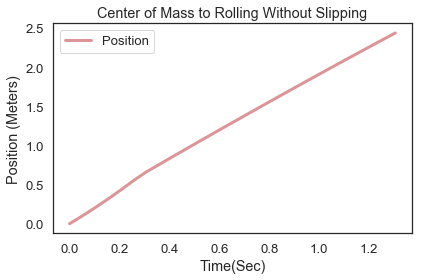

In [11]:
plot(results.x,'r',label='Position') 
    #plots position
#plot(results.vx,label='Velocity')
    #plots velocity 
#plot(results.omega,label='Omega')
    #plots angular velocity
#plot(results.theta,label='Theta')
    #plots angular position
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Position (Meters)')

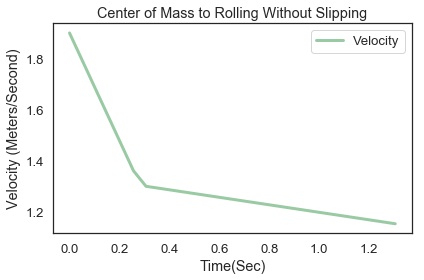

In [12]:
plot(results.vx,'g',label='Velocity')
    #plots velocity 
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Velocity (Meters/Second)')

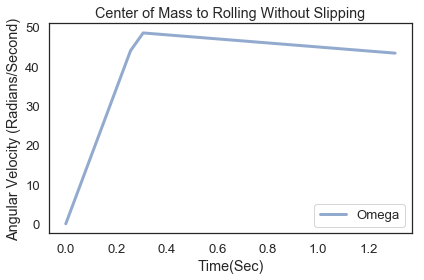

In [13]:
plot(results.omega,'b',label='Omega')
    #plots angular velocity
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Angular Velocity (Radians/Second)')

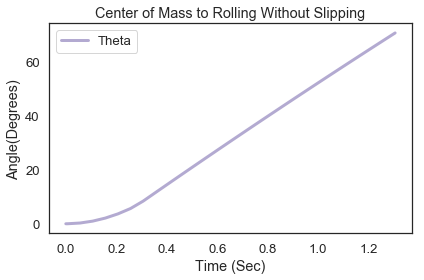

In [14]:
plot(results.theta,'m',label='Theta')
    #plots angular position
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time (Sec)',
         ylabel='Angle(Degrees)')

## Sweet Spot

In [15]:
params = Params(params,h=.01143)
system = make_system(params)
results, details = run_ode_solver(system,slope_func,events=event_func, max_step=0.05)

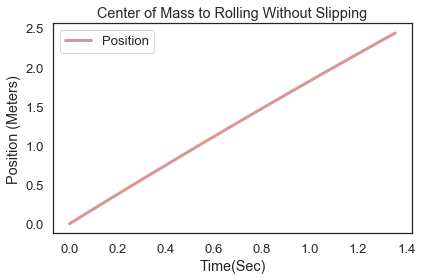

In [16]:
plot(results.x,'r',label='Position') 
    #plots position
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Position (Meters)')

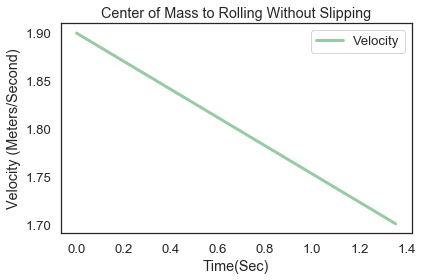

In [17]:
plot(results.vx,'g',label='Velocity')
    #plots velocity 
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Velocity (Meters/Second)')

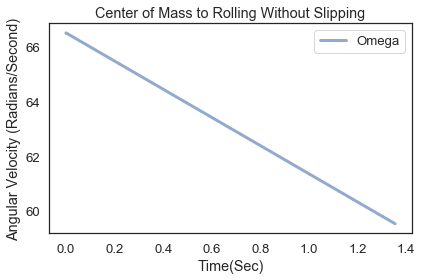

In [18]:
plot(results.omega,'b',label='Omega')
    #plots angular velocity
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Angular Velocity (Radians/Second)')

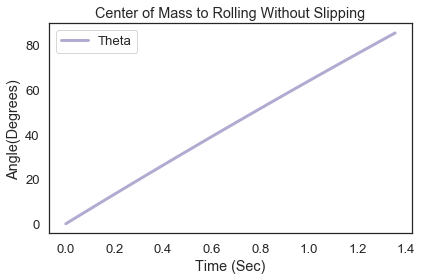

In [19]:
plot(results.theta,'m',label='Theta')
    #plots angular position
decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time (Sec)',
         ylabel='Angle(Degrees)')

## Sweeping Heights to Time to Start Rolling Without Slipping


In [20]:
sh= (np.linspace(0,.028,100))
#Heights above the center of mass to the outer radius of the cue ball

In [21]:
sweep = SweepSeries()

In [22]:
for x in range(len(sh)):
    params = Params(params,h=sh[x])
    system = make_system(params)
  
    #print(system.t_roll)
    sweep[sh[x]] = system.t_roll

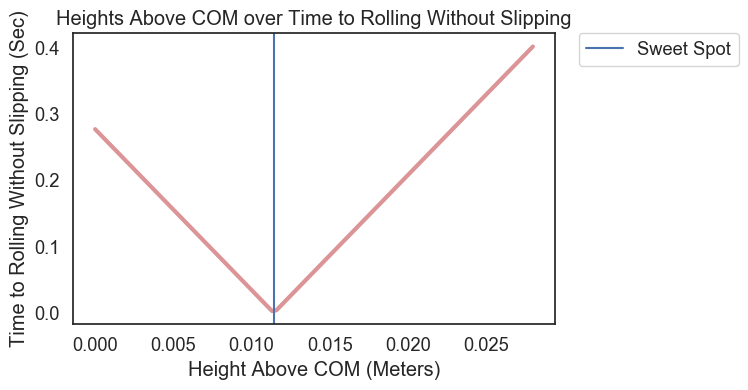

In [23]:
plt.figure(dpi = 100)
plot(sweep,'r')
plt.axvline(x=.01143,label='Sweet Spot') 
decorate(title="Heights Above COM over Time to Rolling Without Slipping",
            ylabel='Time to Rolling Without Slipping (Sec)',
            xlabel='Height Above COM (Meters)')

legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

## Sweeping Multiple Heights Above the Center of Mass



In [24]:
sh= (np.linspace(0,.028,5))
sh= np.sort(np.insert(sh,0,.01143))
print(sh)
 #Heights above the center of mass to the outer radius of the cue ball
sweep2=SweepSeries()

[0.      0.007   0.01143 0.014   0.021   0.028  ]


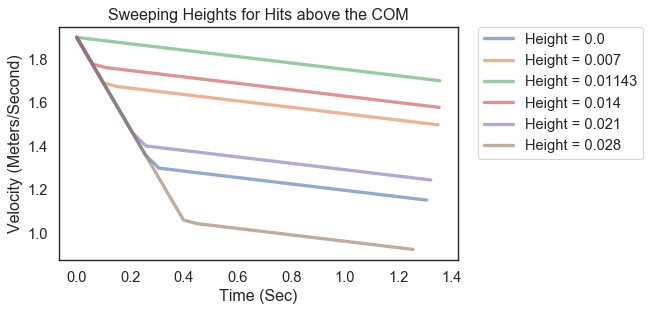

In [25]:
plt.figure(dpi = 80)
for x in range(len(sh)):
    params = Params(params,h=sh[x])
    system = make_system(params)

    results, details = run_ode_solver(system,slope_func,events=event_func, max_step=0.05)
    plot(results.vx,label=("Height = " + str(sh[x])))
    
    decorate(title="Sweeping Heights for Hits above the COM",
            xlabel='Time (Sec)',
            ylabel='Velocity (Meters/Second)')
    sweep2[sh[x]] = get_last_value(results.vx)
    legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

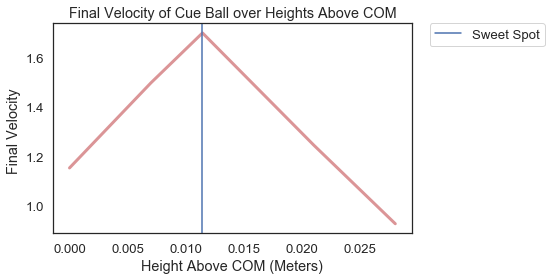

In [26]:
plot(sweep2,'r')
decorate(title="Final Velocity of Cue Ball over Heights Above COM",
            ylabel='Final Velocity ',
            xlabel='Height Above COM (Meters)')
plt.axvline(x=.01143,label='Sweet Spot') 


legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)